In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("creditcard.csv")

In [3]:
dfcopy=df.copy()

In [4]:
dfcopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
dfcopy.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<Figure size 1500x1500 with 0 Axes>

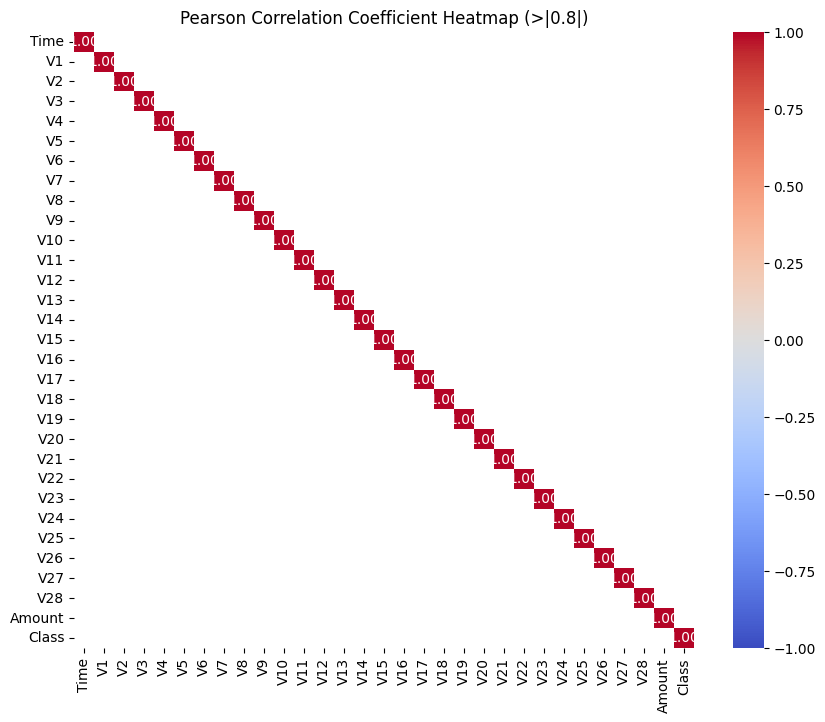

In [6]:

plt.figure(figsize=(15, 15))
# Plot the heatmap with annotations to show the correlation coefficients

# Calculate the Pearson correlation matrix
correlation_matrix = dfcopy.corr(method='pearson')

# Set correlations below 0.8 to NaN
correlation_matrix_filtered = correlation_matrix.where(abs(correlation_matrix) > 0.7)

# Plot the heatmap with the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filtered, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", mask=correlation_matrix_filtered.isnull())
plt.title("Pearson Correlation Coefficient Heatmap (>|0.8|)")
plt.show()


In [7]:
dfcopy.Time.head(15)

0      0.0
1      0.0
2      1.0
3      1.0
4      2.0
5      2.0
6      4.0
7      7.0
8      7.0
9      9.0
10    10.0
11    10.0
12    10.0
13    11.0
14    12.0
Name: Time, dtype: float64

In [10]:
outliers_percentages = {}

for col in dfcopy.select_dtypes(include=['float64', 'int64']).columns:  # Select only numerical columns
    # Calculate Q1, Q3, and IQR
    Q1 = dfcopy[col].quantile(0.25)
    Q3 = dfcopy[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Calculate the percentage of outliers
    outliers = dfcopy[(dfcopy[col] < lower_bound) | (dfcopy[col] > upper_bound)]
    outliers_percentages[col] = len(outliers) / len(dfcopy) * 100  # Store percentage of outliers for the column
    
    # Remove outliers
    dfcopy = dfcopy[(dfcopy[col] >= lower_bound) & (dfcopy[col] <= upper_bound)]

# Output the percentage of outliers for each column
print(outliers_percentages)

{'Time': 0.0, 'V1': 2.4795738868777804, 'V2': 3.038038488541648, 'V3': 0.4117976881403008, 'V4': 3.783025973348049, 'V5': 3.1237890037666824, 'V6': 5.447396106259825, 'V7': 1.087687680064982, 'V8': 6.46401656102172, 'V9': 2.597752973400582, 'V10': 3.7716893262224898, 'V11': 0.04488374135256179, 'V12': 4.974570728516903, 'V13': 0.6389645076788741, 'V14': 3.2288080394528706, 'V15': 1.0998931623931623, 'V16': 3.0068974457305515, 'V17': 1.041353425328834, 'V18': 2.9132715076756854, 'V19': 3.1908049174911755, 'V20': 5.145429943360755, 'V21': 0.49486201934001567, 'V22': 0.020298901321965948, 'V23': 2.3107377610841815, 'V24': 1.6412288108073003, 'V25': 0.7692663246237859, 'V26': 3.3198472164921013, 'V27': 11.68016849176469, 'V28': 6.054442444221043, 'Amount': 8.650352550808794, 'Class': 0.011805088901400265}


In [12]:
dfcopy.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,...,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.000000,110109.0
mean,95424.992217,0.854230,0.083531,0.080770,0.114745,-0.125202,-0.418485,0.018886,0.008799,0.023935,...,-0.044934,-0.065413,0.015420,0.015548,0.060072,-0.014328,0.011952,0.003598,28.902665,0.0
std,46682.557235,1.110754,0.672926,1.167087,0.989345,0.714041,0.599916,0.631675,0.276878,0.799492,...,0.234668,0.658593,0.183806,0.501910,0.403285,0.409426,0.092905,0.061185,33.563253,0.0
min,0.000000,-3.087106,-2.611287,-3.469030,-3.178091,-2.508760,-2.316707,-2.070343,-0.861235,-2.351125,...,-0.795202,-2.189110,-0.527654,-1.407372,-1.251743,-1.107366,-0.247754,-0.165501,0.000000,0.0
25%,55268.000000,-0.278402,-0.355564,-0.725123,-0.613694,-0.588407,-0.836266,-0.430814,-0.184336,-0.453069,...,-0.236339,-0.619051,-0.105972,-0.315066,-0.265278,-0.309649,-0.046363,-0.043025,2.970000,0.0
50%,80977.000000,1.182476,0.055920,0.232296,0.218218,-0.123179,-0.481862,0.060010,-0.019497,0.004357,...,-0.057550,-0.081184,0.006555,0.040610,0.088527,-0.001738,-0.001819,0.008499,14.480000,0.0
75%,140449.000000,1.930680,0.559246,0.940649,0.716893,0.357608,-0.041533,0.453886,0.171182,0.514881,...,0.132060,0.436963,0.132858,0.394126,0.370378,0.203036,0.051830,0.033658,44.000000,0.0
max,172785.000000,2.379970,2.775110,3.790995,3.060921,2.433526,1.809233,2.132937,0.881887,2.365008,...,0.730670,2.049508,0.510510,1.299212,1.287646,1.008886,0.262850,0.164505,141.510000,0.0


In [6]:
dfcopy3=df.copy()

In [7]:
dfcopy3.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [8]:
def calculate_outliers(df, columns):
    outlier_percentage = {}
    for col in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile range
        
        # Define outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Count outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_percentage[col] = (len(outliers) / len(df)) * 100  # Percentage of outliers

    return outlier_percentage

# Define columns to analyze (excluding 'Class')
columns_to_check = dfcopy3.drop(columns=['Class']).columns.tolist()

# Calculate outlier percentages
outlier_percentages = calculate_outliers(dfcopy3, columns_to_check)

# Display outlier percentages
print("Outlier percentages for each column (excluding 'Class'):")
for column, percentage in outlier_percentages.items():
    print(f"{column}: {percentage:.2f}%")

# Removing outliers from the dataset (excluding 'Class')
for col in columns_to_check:
    Q1 = dfcopy3[col].quantile(0.25)
    Q3 = dfcopy3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter the dataset to keep only non-outliers
    dfcopy3 = dfcopy3[(dfcopy3[col] >= lower_bound) & (dfcopy3[col] <= upper_bound)]

# Display the shape of the dataset after removing outliers
print(f"Shape of dataset after removing outliers: {dfcopy3.shape}")

Outlier percentages for each column (excluding 'Class'):
Time: 0.00%
V1: 2.48%
V2: 4.75%
V3: 1.18%
V4: 3.91%
V5: 4.32%
V6: 8.06%
V7: 3.14%
V8: 8.47%
V9: 2.91%
V10: 3.33%
V11: 0.27%
V12: 5.39%
V13: 1.18%
V14: 4.97%
V15: 1.02%
V16: 2.87%
V17: 2.61%
V18: 2.64%
V19: 3.58%
V20: 9.75%
V21: 5.09%
V22: 0.46%
V23: 6.51%
V24: 1.68%
V25: 1.88%
V26: 1.96%
V27: 13.75%
V28: 10.65%
Amount: 11.20%
Shape of dataset after removing outliers: (110122, 31)


In [11]:
from sklearn.metrics import f1_score, recall_score ,precision_score , precision_recall_curve
X=dfcopy3.drop("Class",axis=1)
y=dfcopy3["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

LR=LogisticRegression()

LR.fit(X_train,y_train)

LogisticRegression()

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='average_precision', cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUPRC: {grid_search.best_score_:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best AUPRC: 0.0015


In [20]:
# Predict on X_test using the best model
from sklearn.metrics import precision_recall_curve, auc
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Calculate Precision-Recall AUC for the test set
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Get probability for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
auprc = auc(recall, precision)

print(f"AUPRC on test set: {auprc:.4f}")

AUPRC on test set: 0.0014


In [27]:
# check that what is the best AupRC that you can obtain for this example and try to achieve that

In [23]:
pred_frame=pd.DataFrame(y_pred)

In [24]:
pred_frame.value_counts()

0    22025
Name: count, dtype: int64

In [25]:
real_test=pd.DataFrame(y_test)

In [26]:
real_test.value_counts()

Class
0        22024
1            1
Name: count, dtype: int64

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

# Define a function to create the model (required for KerasClassifier)
def create_model(dropout_rate=0.2, hidden_units=64):
    model = Sequential()
    model.add(Dense(hidden_units, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(hidden_units, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Wrap the model in a KerasClassifier
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'epochs': [ 20],
    'batch_size': [32],
    'dropout_rate': [0.2],
    'hidden_units': [64, 128],
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='average_precision', cv=5)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best AUPRC: {grid_search.best_score_:.4f}")

C:\Users\masud\AppData\Local\Temp\ipykernel_2992\512658925.py:19: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)
c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "c:\users\masud\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File 

Best parameters: {'batch_size': 32, 'dropout_rate': 0.2, 'epochs': 20, 'hidden_units': 64}
Best AUPRC: nan


In [30]:
pred_frame_dp=pd.DataFrame(y_pred_dp)

In [31]:
pred_frame_dp.value_counts()

0    22025
Name: count, dtype: int64

In [32]:
y_pred_dp_train = best_dp.predict(X_train)

2754/2754 [==============================] - 3s 1ms/step


In [33]:
tain_frame_dp=pd.DataFrame(y_pred_dp_train)

In [34]:
tain_frame_dp.value_counts()

0    88097
Name: count, dtype: int64

In [37]:
dfcopy3.Class.value_counts()

Class
0    110109
1        13
Name: count, dtype: int64

In [38]:
dfcopy3.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284794,172777.0,-1.266580,-0.400461,0.956221,-0.723919,1.531993,-1.788600,0.314741,0.004704,0.013857,...,-0.157831,-0.883365,0.088485,-0.076790,-0.095833,0.132720,-0.028468,0.126494,0.89,0
284796,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
284797,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0


In [39]:
from sklearn.preprocessing import StandardScaler

# Assume 'Class' is the target column in your DataFrame
features = dfcopy3.drop(columns=['Class'])  # Drop the target column for scaling
target = dfcopy3['Class']  # Keep the target column separately

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
scaled_features = scaler.fit_transform(features)

# Convert the scaled features back to a DataFrame
scaled_features_df = pd.DataFrame(scaled_features, columns=features.columns, index=features.index)

# Combine the scaled features with the target column
df_standardized = pd.concat([scaled_features_df, target], axis=1)

print(df_standardized.head())

        Time        V1        V2        V3        V4        V5        V6  \
1  -2.044080  0.304018  0.271291  0.073418  0.336913  0.259327  0.560292   
5  -2.044037 -1.152529  1.303155  0.908542 -0.286111  0.764854  0.648028   
6  -2.043994  0.338050  0.085317 -0.030356  1.099472  0.443998  1.152171   
9  -2.043887 -1.073568  1.539540  0.825647 -0.340625  0.874615  0.286246   
12 -2.043865  0.356364 -1.939620  0.259743 -1.364210 -1.905014 -0.558009   

          V7        V8        V9  ...       V21       V22       V23       V24  \
1  -0.154718  0.275603 -0.349382  ... -0.770663 -0.870459  0.467250 -0.708073   
5   0.723913  0.908449 -0.741194  ... -0.695994 -0.750735 -0.227435 -0.770992   
6  -0.038132  0.261557  0.551685  ... -0.523244 -0.311732 -0.922231 -1.585141   
9   1.001562  0.219391 -0.951401  ... -0.860745 -0.862989 -0.741006 -0.798135   
12 -1.121366 -0.853429 -2.649108  ... -0.796377 -0.634514  0.376826  0.751707   

         V25       V26       V27       V28    Amount  Cl

In [40]:
df_standardized.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
1,-2.044080,0.304018,0.271291,0.073418,0.336913,0.259327,0.560292,-0.154718,0.275603,-0.349382,...,-0.770663,-0.870459,0.467250,-0.708073,0.265523,0.342540,-0.225332,0.181820,-0.780957,0
5,-2.044037,-1.152529,1.303155,0.908542,-0.286111,0.764854,0.648028,0.723913,0.908449,-0.741194,...,-0.695994,-0.750735,-0.227435,-0.770992,-0.726232,0.293739,2.603706,1.266362,-0.751760,0
6,-2.043994,0.338050,0.085317,-0.030356,1.099472,0.443998,1.152171,-0.038132,0.261557,0.551685,...,-0.523244,-0.311732,-0.922231,-1.585141,1.711053,-0.593259,0.242795,0.025627,-0.712433,0
9,-2.043887,-1.073568,1.539540,0.825647,-0.340625,0.874615,0.286246,1.001562,0.219391,-0.951401,...,-0.860745,-0.862989,-0.741006,-0.798135,-0.321905,0.265123,2.521632,1.298975,-0.751462,0
12,-2.043865,0.356364,-1.939620,0.259743,-1.364210,-1.905014,-0.558009,-1.121366,-0.853429,-2.649108,...,-0.796377,-0.634514,0.376826,0.751707,0.250557,-0.832021,0.155695,0.634522,2.758760,0


In [41]:
X=df_standardized.drop("Class",axis=1)
y=df_standardized["Class"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Example hyperparameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    
}

rf_standard = RandomForestClassifier(random_state=42)
grid_search_standard = GridSearchCV(estimator=rf_standard, param_grid=param_grid, scoring='average_precision', cv=5)
grid_search_standard.fit(X_train, y_train)

# Best parameters and score
print(f"Best parameters: {grid_search_standard.best_params_}")
print(f"Best AUPRC: {grid_search_standard.best_score_:.4f}")

Best parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best AUPRC: 0.0015


In [44]:
#try after standarization
best_rf_standard=grid_search_standard.best_estimator_
y_pred_standard=best_rf_standard.predict(X_test)

In [46]:
# Calculate Precision-Recall AUC for the test set
y_pred_proba_standard = best_rf_standard.predict_proba(X_test)[:, 1]  # Get probability for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_standard)
auprc_standard = auc(recall, precision)

print(f"AUPRC on test set: {auprc_standard:.4f}")

AUPRC on test set: 0.0014


In [63]:
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

# Function to create the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])
    return model

# Create the KerasClassifier using the create_model function
model2 = KerasClassifier(build_fn=create_model, verbose=0)

# Fit the model
model2.fit(X_train, y_train)

C:\Users\masud\AppData\Local\Temp\ipykernel_2992\3245533995.py:22: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model2 = KerasClassifier(build_fn=create_model, verbose=0)


In [64]:
y_pred_proba_dp_standard = model2.predict(X_test)  # Get probability for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dp_standard)
auprc_dp_standard = auc(recall, precision)

print(f"AUPRC on test set: {auprc_dp_standard:.10f}")

689/689 [==============================] - 1s 1ms/step
AUPRC on test set: 0.5000227015


In [65]:
y_pred_proba_dp_standard_train = model2.predict(X_train)  # Get probability for the positive class
precision, recall, _ = precision_recall_curve(y_train, y_pred_proba_dp_standard_train)
auprc_dp_standard_train = auc(recall, precision)

print(f"AUPRC on test set: {auprc_dp_standard_train:.4f}")

2754/2754 [==============================] - 3s 1ms/step
AUPRC on test set: 0.5001


In [72]:
y_pred_proba_dp_standard_three = model3.predict(X_test)  # Get probability for the positive class
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_dp_standard_three)
auprc_dp_standard_three = auc(recall, precision)

print(f"AUPRC on test set: {auprc_dp_standard_three:.10f}")

689/689 [==============================] - 1s 1ms/step
AUPRC on test set: 0.5000227015
